In [ ]:
# Installs the Ultralytics package, which includes YOLOv8 and its training/inference utilities.
# Installs OpenCV, a powerful computer vision library used for image loading, preprocessing, and visualization.
# Installs PyTorch and TorchVision, the deep learning framework and its vision utilities.
!pip install ultralytics
!pip install opencv-python
!pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 24.1 MB/s eta 0:00:00


In [ ]:
#  Installs the Roboflow Python SDK, which allows seamless integration with Roboflow-hosted datasets.
#  Authenticates with Roboflow using your API key.
#  Downloads the dataset in YOLOv8 format.


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZhHWi5iyqRsph8wr0kRs")
project = rf.workspace("labview-86hnw").project("indian_license_plate-mww3v")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian_license_plate-2 in yolov8:: 100%|██████████| 5412/5412 [00:00<00:00, 6204.52it/s]


In [ ]:
from ultralytics import YOLO

# Load a pre-trained model or start training from scratch
model = YOLO("yolov8s.pt")

# Train the model
# Make sure the data.yaml has the correct path to the dataset
#!yolo task=detect mode=train model=yolov8s.pt data=/content/vehicle_make-4/data.yaml epochs=500 imgsz=19 plots=True
!yolo task=detect mode=train model=yolov8s.pt data=/content/Indian_license_plate-2/data.yaml epochs=500 imgsz=500 plots=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Indian_license_plate-2/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [ ]:
#  Imports the Colab-specific patch for OpenCV's imshow function.
# - In standard Python environments, cv2.imshow() opens a GUI window to display images.

from google.colab.patches import cv2_imshow # Import the patch for cv2.imshow


#Make model identification using yolov8s custom object detection


0: 32x32 3 velar2025s, 8.6ms
Speed: 0.8ms preprocess, 8.6ms inference, 598.8ms postprocess per image at shape (1, 3, 32, 32)
Class ID: 7, Label: velar2025, Confidence: 1.00
Class ID: 7, Label: velar2025, Confidence: 0.39
Class ID: 7, Label: velar2025, Confidence: 0.26


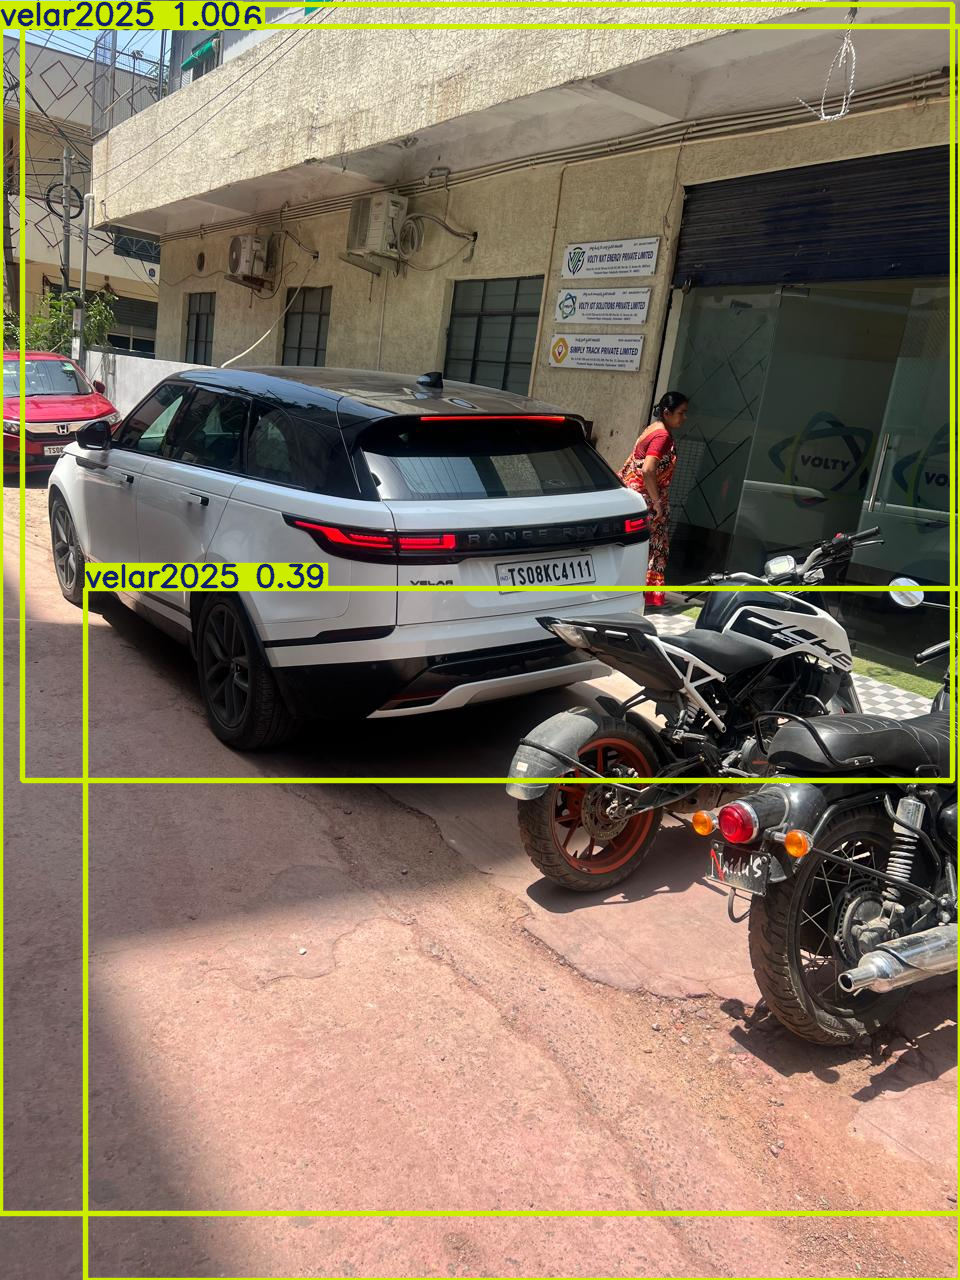

In [ ]:
import cv2
from ultralytics import YOLO
# Load the trained YOLOv8 model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # Replace with your .pt model path

# Load an image for testing
img = cv2.imread('/content/velar.jpg')  # Replace with the path to an image you want to test

# Perform prediction
results = model.predict(img)

# Get the class names from the model's classes
class_names = model.names

# Iterate over the results
for result in results:
    # Access the detected boxes and their properties
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        class_id = int(box.cls[0])  # Class ID
        confidence = box.conf[0]  # Confidence score

        # Print the class ID and label
        class_label = class_names[class_id]  # Get class label from class ID
        print(f'Class ID: {class_id}, Label: {class_label}, Confidence: {confidence:.2f}')

    # Annotate the image with bounding boxes and labels
    annotated_frame = result.plot()  # Annotates the image with bounding boxes and labels

    # Display the annotated image
    cv2_imshow(annotated_frame)
    cv2.waitKey(0)  # Press any key to close the window

#Clean up OpenCV windows (not strictly necessary in Colab).
cv2.destroyAllWindows()



image 1/1 /content/car_v4.jpeg: 384x640 1 car, 1 frisbee, 1 sports ball, 47.1ms
Speed: 2.0ms preprocess, 47.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/image.jpg: 32x32 1 velar2025, 6.5ms
Speed: 0.3ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 32, 32)
Car Make: velar2025, Confidence: 0.9999170303344727


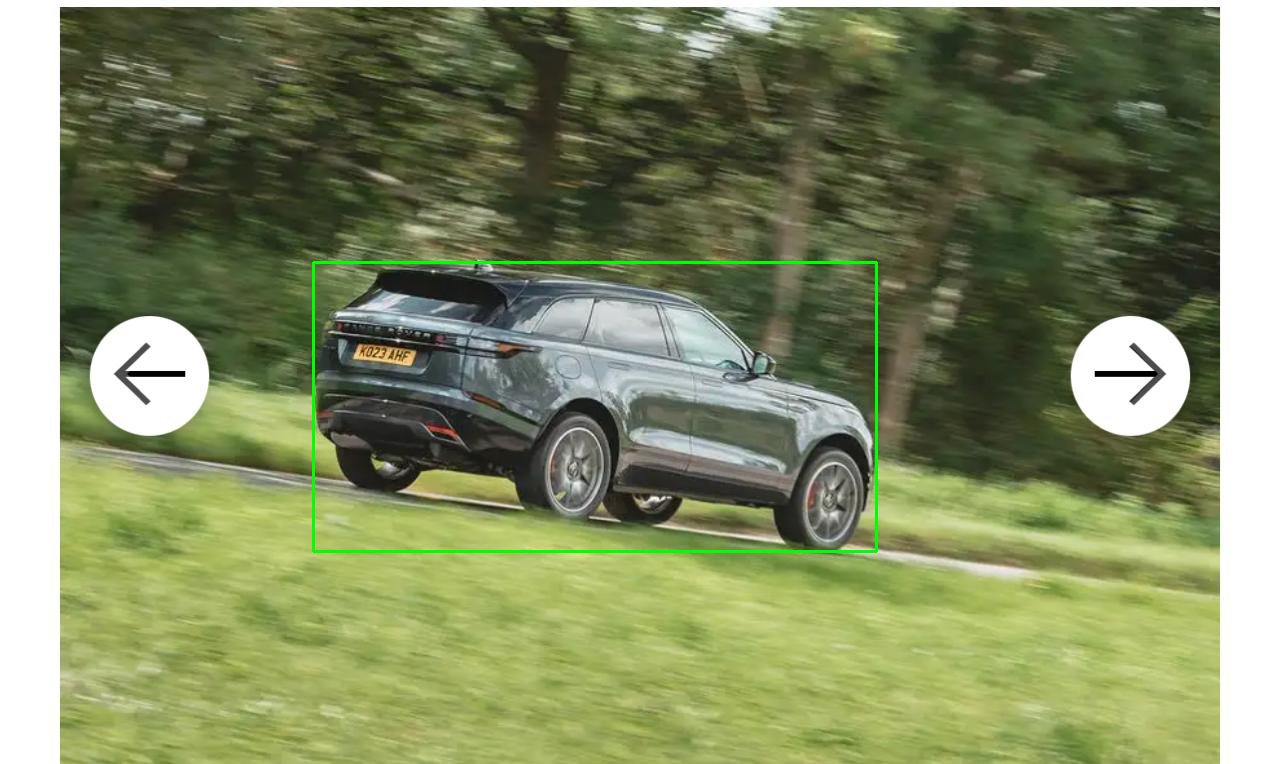

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load YOLOv8 model for car detection (trained on COCO dataset)
car_detection_model = YOLO('yolov8s.pt')

# Load YOLOv8 model for car make classification (or another classification model)
car_make_model = YOLO('/content/runs/detect/train3/weights/best.pt')

# Load an image for processing
image_path = '/content/car_v4.jpeg'
image = cv2.imread(image_path)
original_image = image.copy()

# Perform car detection
results = car_detection_model.predict(source=image_path)

# Iterate over detected objects
for result in results[0].boxes.data.tolist():  # Convert the results to a list of lists
    x1, y1, x2, y2, confidence, class_id = result
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    class_id = int(class_id)

    # Check if detected class is a car (assuming COCO class ID for car is 2)
    if class_id == 2:  # COCO class ID for 'car'
        # Draw bounding box around the detected car
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Calculate the area of the bounding box
        area = (x2 - x1) * (y2 - y1)

        if area > 500:
            # Crop the car region from the image
            car_crop = image[y1:y2, x1:x2]

            # Save the cropped car image
            crop_path = '/content/image.jpg'
            cv2.imwrite(crop_path, car_crop)

            # Classify the cropped car image
            car_results = car_make_model.predict(source=crop_path)

            # Display classification results
            for car_result in car_results[0].boxes.data.tolist():  # Access the Results object and convert to list
                x1, y1, x2, y2, car_confidence, car_class = car_result
                car_class = int(car_class)
                class_label = class_names[car_class]  # Get class label from class ID
                print(f'Car Make: {class_label}, Confidence: {car_confidence}')

# Save or display the image with bounding boxes
cv2_imshow( original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
